In [119]:
import numpy as np 
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from sympy import *
import pydataset
import env
import seaborn as sns
from rcm_library import*
from sympy.matrices import Matrix
printingprefs()
pd.set_option("compute.use_bottleneck", True)
pd.set_option("compute.use_numexpr", True)
pd.set_option("display.latex.repr",False)
pd.set_option("display.latex.escape",False)
# pd.describe_option() 
# pd.io.formats.style.Styler?


In [120]:
common_stats_vars_symbolic()

[alpha_false~pos  beta_false~neg  H_null  H_alt  mu_pop  sigma_pop  mu_samp\_a  sigma_samp\_a  mu_samp\_b  sigma_samp\_b  t_stat  z_stat  rho_cor~coef  kappa_kurt  gamma_skew]

Exercises

Do your work for this exercise in a jupyter notebook named hypothesis_testing.ipynb.

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

- Has the network latency gone up since we switched internet service providers?
- Is the website redesign any good?
- Is our television ad driving more sales?


- $$ Has~the~network~latency~gone~up~since~we~switched~internet~service~providers? $$


- $$ H_{null}:$$
$$"latency~has~remained~constant~through~the~switch"$$


- $$ H_{alt}:$$
$$"latency~has~NOT~remained~constant~through~theswitch"$$


- $$ True~Positive:$$
$$"we~reject~ H_{null} ~and~are~correct,the~latency~didn't~remain~constant"$$


- $$ True~Negative:$$
$$"we~accept~ H_{null}~and~are~ correct,the~latency~remained~constant"$$


- $$ TypeI~Error:$$
$$"we~reject~ H_{null}~we~are~incorrect,the~latency~remained~constant"$$


- $$ TypeII~Error:$$
$$"we~accept~ H_{null} ~but~are~incorrect,the~latency~did~not~remain~constant"$$




$$Is~the~website~redesign~any`good?$$
- $$ H_{null}$$
$$"Visitor~count~will~not~increase~after~the~redesign."$$


- $$ H_{alt}$$
 $$"Visitor~count~will~increase~after~the~redesign."$$


- $$ True~Positive:$$
$$"We~reject~ H_{null} ~and~are~correct,the~count~increased."$$


- $$ True~Negative:$$
$$"We~accept~ H_{null}~ and~are~correct,the~count~didn't~increase."$$


- $$TypeI~Error:$$
$$"We~reject~H_{null}but~are~incorrect,the~count~didn't~increase."$$


- $$TypeII~Error:$$
$$"We~accept~H_{null}but~are~incorrect,the~count~increased"$$




 $$Is~our~television~ad~driving~more~sales?$$


- $$H_{null}$$
$$"Monthly~sales~will~not~increase~after`thead~is~ran."$$


- $$H_{alt}$$
$$"Monthly~sales~will~increase~after~the~ad~is~ran."$$


- $$True~Positive:$$
$$"We~reject~H_{null}~and~are~correct,the~sales~increased."$$


- $$True~Negative:$$
$$"We~accept~H_{null}~~and~are~correct~,~the~sales~didn't~increase."$$


- $$Type~I~Error~:$$
$$"We~reject~H_{null}~but~are~incorrect~,~the~sales~didn't~increase."$$





Exercises (T-test)

- Continue working in your hypothesis_testing notebook.

1. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 
- A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days.
- A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 
- Use a .05 level of significance.
 - i.e 
        $$H_{null}:\mu_a=\mu_b$$
        $$H_{alt}:\mu_a !=\mu_b$$

2. - Load the mpg dataset and use it to answer the following questions:

    - Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
    - Alternative Hypothesis (2-tail, significantly different) 
        - i.e 
        $$H_{null}:\mu_a=\mu_b$$
        $$H_{alt}:\mu_a !=\mu_b$$
    - Are compact cars more fuel-efficient than the average car?
        - i.e 
        $$ H_{null}: \mu_{obs} <= \mu_{th} $$
        $$ H_{alt}: \mu_{obs} > \mu_{th} $$
    - Do manual cars get better gas mileage than automatic cars?
        - i.e
        $$ H_{null}: \mu_a < \mu_b $$
        $$ H_{alt}: \mu_a >= \mu_b $$
         

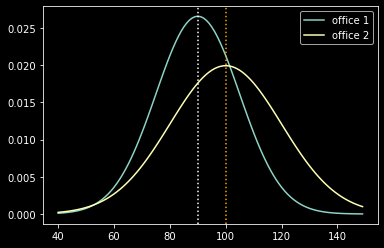

In [122]:
alpha=5/100


office_1 = stats.norm(90, 15).rvs(40)
office_2 = stats.norm(100, 20).rvs(50)




x = np.arange(40, 150)
y1 = stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)
plt.plot(x, y1, label='office 1')
plt.plot(x, y2, label = 'office 2')
plt.axvline(90, ls=':')
plt.axvline(100, ls=':', color='orange')
plt.legend()
plt.show()






In [123]:
t_stat, p_val = stats.ttest_ind(office_1, office_2, equal_var=False)

display(
sympify(f'{t_stat:.4g}'),
sympify(f'{p_val:.4g}'),
symbols(one_tail_hypthonesis(t_stat, p_val))
)

In [124]:
#2


## aquiring
df=pydataset.data('mpg')
df=pd.DataFrame(df)

#cleaning 
df['avg_mpg'] = stats.hmean(df[['cty','hwy']], axis=1)
df.trans.unique()
auto=df[df.trans.str.contains('auto')]
manual=df[df.trans.str.contains('auto')==0]


# [display(symbols(i))for i in df['class'].unique().tolist()]#toggle 

MMVIIImpg=df[df.year==2008].avg_mpg
MCMXCIXmpg=df[df.year==1999].avg_mpg
compactmpg= df[df['class']=='compact'].avg_mpg
autompg=auto.avg_mpg
manmpg=manual.avg_mpg
popmpg=df.avg_mpg
#isolating to compare


alpha = .05

variance_2=[
popmpg.var(),
MMVIIImpg.var(),
MCMXCIXmpg.var(),
compactmpg.var(),
autompg.var(),
manmpg.var()
]

mus_2=[
popmpg.mean(),
MMVIIImpg.mean(),
MCMXCIXmpg.mean(),
compactmpg.mean(),
autompg.mean(),
manmpg.mean()
]

vars=[
'Fields',
'popmpg',
'MMVIIImpg',
'MCMXCIXmpg',
'compactmpg',
'autompg',
'manmpg'
]

In [125]:

variance_2=[(symbols((f'{i:.4g}'))) for i in variance_2]
mus_2=[symbols((f'{i:.4g}')) for i in mus_2]
vars=[symbols(i)for i in vars]
mpgvarhead=symbols('MPG~~\sigma^2')
mpgmuhead=symbols('MPG~~\mu')
variance_2.insert(0,mpgvarhead)
mus_2.insert(0,mpgmuhead)
mpgMat=Matrix([vars,variance_2,mus_2])
mpgMat.transpose()

[  Fields    MPG~~\sigma^2  MPG~~\mu]
[                                   ]
[  popmpg        24.11       19.59  ]
[                                   ]
[MMVIIImpg       22.55       19.49  ]
[                                   ]
[MCMXCIXmpg      25.85       19.68  ]
[                                   ]
[compactmpg      12.76        23.5  ]
[                                   ]
[ autompg        20.43       18.58  ]
[                                   ]
[  manmpg        25.67       21.63  ]

In [126]:
t_years, p_years = stats.ttest_ind(MMVIIImpg, MCMXCIXmpg.values, equal_var=False)
t_trans, p_trans = stats.ttest_ind(autompg, manmpg, equal_var=False)
t_compact, p_compact = stats.ttest_1samp(compactmpg,popmpg.mean())

a=common_stats_vars_symbolic()


display(
    
(sympify(('Prob1'))),
a[10],
(sympify((f'{t_years:.4g}'))),
(sympify((f'{p_years:.4g}'))),
symbols(one_tail_hypthonesis(p_years,alpha)))
print("\n\n\n")



display(

(sympify(('Prob2'))),
a[10],
(sympify((f'{t_compact:.4g}'))),
(sympify((f'{p_compact:.4g}'))),
symbols(two_tail_hyp_test(p_compact,t_compact,alpha)))
print("\n\n\n")


display(

(sympify(('Prob3'))),
a[10],
(sympify((f'{t_trans:.4g}'))),
(sympify((f'{p_trans:.4g}'))),
symbols(one_tail_hypthonesis(p_trans,alpha))

)

# mpgarrayHyptest=np.array(mpgarrayHyptest)
# mpgarrayHyptest=[symbols(i) for i in mpgarrayHyptest]
# mpgarrayHyptest=Matrix(mpgarrayHyptest)
# mpgarrayHyptest

In [127]:
## Just expermenting with sympy and its stats 

# from sympy.stats import Skellam,Poisson, density, E, variance


# z = Symbol("z", integer=True)
# mu1 = Symbol("mu1", positive=True)
# mu2 = Symbol("mu2", positive=True)

# rate = Symbol("lambda", positive=True)
# X = Poisson("x", rate)
# display(symbols('Poisson\:'),density(X)(z))
# X=Skellam("x", mu1, mu2)
# display(symbols("Skellum\:"),density(X)(z))







Exercises (Correlation)

Continue working in your hypothesis_testing notebook.

- Use the telco_churn data.
1. Does tenure correlate with monthly charges?
2. Total charges? 
3. What happens if you control for phone and internet service?
- Use the employees database.
3. Is there a relationship between how long an employee has been with the company and their salary?
4. Is there a relationship between how long an employee has been with the company and the number of titles they have had?
- Use the sleepstudy data. 
5. Is there a relationship between days and reaction time?

In [128]:
telco_churn=pd.read_csv('telco_churn.csv')
telco_churn=pd.DataFrame(telco_churn)



# telco_churn['TotalCharges']=telco_churn.TotalCharges.str.replace(',','').str.strip()
# display(
# telco_churn.head(),
# telco_churn.info(),
# telco_churn.describe()
# )

In [129]:
telco_churn.TotalCharges=(telco_churn.TotalCharges.str.isnumeric())

# TotalCharges=np.array(telco_churn.TotalCharges)
# TotalCharges=[float(i) for i in TotalCharges]

# display(
# telco_churn.head(),
# telco_churn.info(),
# telco_churn.describe()
# )


In [130]:
r_1, p_1 = stats.pearsonr(telco_churn.tenure, telco_churn.MonthlyCharges)
r_2, p_2 = stats.pearsonr(telco_churn.tenure,telco_churn.TotalCharges )


In [147]:
prob_1=Matrix([
    sympify(f'{r_1:.4G}'),
    sympify(f'{p_1:.4G}'),
   
])


prob_2=Matrix([
    sympify(f'{r_2:.4G}'),
    sympify(f'{p_2:.4G}')
   
])


display(
(sympify(('Prob1'))),    
prob_1,
symbols(one_tail_hypthonesis(p_1,alpha)))


display(
(sympify(('Prob2'))), 
prob_2,
symbols(one_tail_hypthonesis(p_2,alpha))
)



[ 0.2479  ]
[         ]
[4.094e-99]

[0.01106]
[       ]
[0.3534 ]

In [132]:
schema = 'employees'
query = 'describe dept_emp ;'
dept_emp_describe=pd.read_sql(query, get_db_url(schema))

query = 'describe employees ;'
employees_describe = pd.read_sql(query, get_db_url(schema))

query = 'describe salaries ;'
salaries_describe = pd.read_sql(query, get_db_url(schema))

query = 'describe titles ;'
titles_describe = pd.read_sql(query, get_db_url(schema))

# display(
#     symbols('dept~emp~describe'),dept_emp_describe,
#     symbols('employees~describe'),employees_describe,
#     symbols('salaries~describe'),salaries_describe,
#     symbols('titles~describe'),titles_describe)




In [133]:
query='''
     SELECT 
     emp_no, 
     title,
     s.salary,
     de.to_date,  
     e.hire_date
   
     
   
     FROM 
     dept_emp as de
	JOIN 
     employees as e USING(emp_no) 
     JOIN
     titles as t USING(emp_no) 
     JOIN
     salaries as s USING(emp_no) 
     where 
     t.to_date>now() 
     and  
     de.to_date>now()
     and
     s.to_date>now();

    '''
employees= pd.read_sql(query, get_db_url(schema))



query='''
     SELECT 
     emp_no, 
     title
   
  
     from
     
     titles 
    
    

    '''
emp_nowhere= pd.read_sql(query, get_db_url(schema))

#all my querys 


In [134]:
employees_relevent=employees## save point to stop querys

employees_relevent=employees_relevent.assign(duration=abs(employees_relevent.hire_date - employees_relevent.to_date))


employees_relevent=employees_relevent.drop(columns=employees_relevent.iloc[:,3:5])


In [135]:
employees_relevent=employees_relevent.assign(duration=employees_relevent.duration.astype(str).str.replace('days, 0:00:00','').astype(int))


alltimeemps=emp_nowhere## do not touch above cell
alltimeemps=alltimeemps.groupby(['emp_no']).nunique() 

alltimeemps.columns=['titlecount']

finaljoin=employees_relevent.join(alltimeemps,how='left',on='emp_no')

In [136]:

def strength_cor(r):
    if r<=0.2:
        x=("no correlation")
    elif r<=0.5:
        x=("weak correlation")
    elif r<=0.75:
        x=("moderate correlation")
    else:
        x=("strong correlation")
    return symbols(x.replace(" ","~"))


r_titlechange, p_title= stats.pearsonr(finaljoin.duration, finaljoin.titlecount)

r_salary, p_sal= stats.pearsonr(finaljoin.duration, finaljoin.salary)

r_salary_str='Correlation~between~Salary~and~Duration'
r_titlechanges_str='Correlation~between~Title~and~Duration'
display(
symbols((r_salary_str)),sympify(f'{r_salary:.4G}'),
strength_cor(r_salary),


symbols((r_titlechanges_str)),sympify(f'{r_titlechange:.4G}'),
strength_cor(r_titlechange)

)



In [137]:
######
#Expermimenting with printing output




# pd.set_option('styler.render.repr','latex')
# pd.set_option('styler.render.encoding', 'latex')
# # pd.set_option('dataframe.style','to_latex')
# # pd.set_option('styler','to_latex')
# pd.set_option('display.notebook_repr_html' ,False)
##broke here
# pd.set_option('display.html.border',10)
# not that intersting yet



# basicall Jupyter notebooks has some live LaTex rendering through KaTex but full LaTek isn't renddered well in 
# Jupyeter





<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


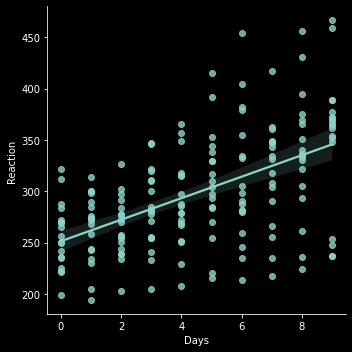

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


None

,Reaction,Days,Subject
count,180.000000,180.000000,180.000000
mean,298.507892,4.500000,341.277778
std,56.328757,2.880293,20.320905
min,194.332200,0.000000,308.000000
25%,255.375825,2.000000,331.000000
50%,288.650800,4.500000,336.000000
75%,336.752075,7.000000,352.000000
max,466.353500,9.000000,372.000000


0    18
1    18
2    18
3    18
4    18
5    18
6    18
7    18
8    18
9    18
Name: Days, dtype: int64

249.5600    1
255.5271    1
329.7247    1
379.4445    1
362.9184    1
           ..
289.5550    1
276.7693    1
299.8097    1
297.1710    1
364.1236    1
Name: Reaction, Length: 180, dtype: int64

None

In [138]:

# 3. 

sleepstudy=pydataset.data('sleepstudy')


#calculate r and p
r, p = stats.pearsonr(sleepstudy.Days, sleepstudy.Reaction)

display(

sleepstudy.head(),
sleepstudy.info(),
sleepstudy.describe(),
sleepstudy.Days.value_counts(),
sleepstudy.Reaction.value_counts(),
sns.lmplot(data=sleepstudy, x='Days', y='Reaction'),
plt.show(),
r, p,
symbols(one_tail_hypthonesis(p,alpha))
)

Exercises ($\chi ^2$)

Continue working in your hypothesis_testing notebook.

1. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

|	| Codeup Student|Not Codeup Student|
| --- | ---| --- |
|Uses a Macbook|	49	|20|
|Doesn't Use A Macbook|	1	|30|

2. Choose another 2 categorical variables from the mpg dataset and perform a 
$\chi^2$
contingency table test with them. Be sure to state your null and alternative hypotheses.

3. Use the data from the employees database to answer these questions:
 - Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
 - Is an employee's gender independent of whether or not they are or have been a manager?

In [139]:
query = 'describe departments ;'
departments_describe = pd.read_sql(query, get_db_url(schema))

query = 'select distinct title from titles  limit 100;'
titles_title = pd.read_sql(query, get_db_url(schema))
titles_title

query = 'show tables;'
tables = pd.read_sql(query, get_db_url(schema))

query = 'describe dept_manager;'
dept_manager_describe = pd.read_sql(query, get_db_url(schema))


In [140]:







display(
symbols('employees~describe')
,employees_describe.style.pipe(make_pretty),
symbols('titles~describe')
,titles_describe.style.pipe(make_pretty),
symbols('salaries~describe')
,salaries_describe.style.pipe(make_pretty),
symbols('dept~emp~describe')
,dept_emp_describe.style.pipe(make_pretty),
symbols('departments~describe')
,departments_describe.style.pipe(make_pretty),
symbols('dept~manage~describe')
,dept_manager_describe.style.pipe(make_pretty),

)


,Field,Type,Null,Key,Default,Extra
0,emp_no,int,NO,PRI,None,
1,birth_date,date,NO,,None,
2,first_name,varchar(14),NO,,None,
3,last_name,varchar(16),NO,,None,
4,gender,"enum('M','F')",NO,,None,
5,hire_date,date,NO,,None,


,Field,Type,Null,Key,Default,Extra
0,emp_no,int,NO,PRI,None,
1,title,varchar(50),NO,PRI,None,
2,from_date,date,NO,PRI,None,
3,to_date,date,YES,,None,


,Field,Type,Null,Key,Default,Extra
0,emp_no,int,NO,PRI,None,
1,salary,int,NO,,None,
2,from_date,date,NO,PRI,None,
3,to_date,date,NO,,None,


,Field,Type,Null,Key,Default,Extra
0,emp_no,int,NO,PRI,None,
1,dept_no,char(4),NO,PRI,None,
2,from_date,date,NO,,None,
3,to_date,date,NO,,None,


,Field,Type,Null,Key,Default,Extra
0,dept_no,char(4),NO,PRI,None,
1,dept_name,varchar(40),NO,UNI,None,


,Field,Type,Null,Key,Default,Extra
0,emp_no,int,NO,PRI,None,
1,dept_no,char(4),NO,PRI,None,
2,from_date,date,NO,,None,
3,to_date,date,NO,,None,


In [141]:
# query='''
#      SELECT 
#      e.gender,
#      t.title,
#      e.emp_no,
#      d.dept_name
#      from
#      employees as e
#      join 
#      titles as t
#      using(emp_no)
#      join
#      salaries as s
#      using(emp_no)
#      join 
#      dept_emp as de
#      using(emp_no)
#      join 
#      departments as d   
#      using(dept_no)
#      join
#      dept_manager as dm
#      using(dept_no)

   
     
#      where
#      s.to_date>now()
#      or
#      de.to_date>now()
#      or
#      t.to_date>now()
#      ;

#     '''
chi_employees= pd.read_sql(query, get_db_url(schema))





In [142]:
employess_chisq_ex=chi_employees## save point





In [148]:
# 1. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.


index= ['Uses MacBook', 'Does''t use MacBook']
columns = ['Codeup Student', 'Not Codeup Student']


observed = pd.DataFrame([[49, 20], [1, 30]], index=index, columns=columns)
# n = observed.values.sum()
# expected = pd.DataFrame([[.372, .132], [.367, .130]], index=index, columns=columns) * n

# chi2 = ((observed - expected)**2 / expected).values.sum()

# nrows, ncols = observed.shape

# degrees_of_freedom = (nrows - 1) * (ncols - 1)

# p = stats.chi2(degrees_of_freedom).sf(chi2)

# display(
# symbols('Observed'),
# Matrix(np.array(observed)),
# symbols('Expected'),
# Matrix(np.array(expected)),
# symbols('chi^2 '),
# sympify(f'{chi2:.4g}'),
# symbols('p'), 
# sympify(f'{p:.4g}')
# )


chi2, p, degf, expected = stats.chi2_contingency(observed)


x=sympify([
symbols('Observed'),
Matrix(observed.values),
sympify('Expected'),
Matrix(expected),
sympify('chi^2'),
sympify(f'{chi2:.4g}'),
sympify('p'),

sympify(f'{p:.4g}'),
])

x=np.array(x,dtype=object)
x=Matrix(x).transpose()



display(
observed.style.pipe(make_pretty),
x,
symbols(one_tail_hypthonesis(p,alpha))

)


,Codeup Student,Not Codeup Student
Uses MacBook,49,20
Doest use MacBook,1,30


[          [49  20]            [34.5  34.5]     2                    ]
[Observed  [      ]  Expected  [          ]  chi   36.65  p  1.412e-9]
[          [1   30]            [15.5  15.5]                          ]

In [144]:
# 2. Choose another 2 categorical variables from the mpg dataset and perform a 
# $\chi^2$
# contingency table test with them. Be sure to state your null and alternative hypotheses.

df=pydataset.data('mpg')
mpg=pd.DataFrame(df)
# mpg.info()
# mpg[mpg.manufacturer=="dodge"].head()
# mpg[mpg['class']=="pickup"].head()

dodge_pick_up=pd.crosstab(mpg.manufacturer=="dodge",mpg['class']=="pickup",colnames=['Pickup truck'],rownames=['Dodge'] )




chi2, p, degf, expected = stats.chi2_contingency(dodge_pick_up)
shapeE=shape(expected)
expected=expected.flatten()
expected=list(expected)
expected=np.array([f'{i:.4g}' for i in expected])
expected=expected.reshape(shapeE[0],shapeE[1])


x=np.array([
symbols('Observed'),
Matrix(dodge_pick_up.values),
sympify('Expected'),
Matrix(expected),
sympify('chi^2'),
sympify(f'{chi2:.4g}'),
sympify('P (chi^2)'),
sympify(f'{p:.4g}')],dtype=object)



x=Matrix(x) .transpose()



display(
dodge_pick_up.style.pipe(make_pretty),
x,
symbols(one_tail_hypthonesis(p,alpha))

)


Pickup truck,False,True
Dodge,,
False,183,14
True,18,19


[          [183  14]            [169.2  27.78]     2          /   2\           ]
[Observed  [       ]  Expected  [            ]  chi   46.75  P\chi /  8.056e-12]
[          [18   19]            [31.78  5.218]                                 ]

In [145]:
#3.
db='employees'
query=	'''
	SELECT d.dept_name, e.gender
	FROM dept_emp de
		LEFT JOIN employees e USING (emp_no)
		LEFT JOIN departments d using (dept_no)
	WHERE de.to_date > NOW()
		AND (d.dept_name = 'Sales'
			OR d.dept_name = 'Marketing')

	;
	'''
gender_employees=pd.read_sql(query,get_db_url(db))


genderbydept=pd.crosstab(
	gender_employees.dept_name,
	gender_employees.gender)





chi2,p, degf, expected = stats.chi2_contingency(genderbydept)
shapeE=shape(expected)
expected=expected.flatten()
expected=list(expected)
expected=np.array([f'{i:.4g}' for i in expected])
expected=expected.reshape(shapeE[0],shapeE[1])


x=np.array([
symbols('Observed'),
Matrix(genderbydept.values),
sympify('Expected'),
Matrix(expected),
sympify('chi^2'),
sympify(f'{chi2:.4g}'),
sympify('P (chi^2)'),
sympify(f'{p:.4g}')],dtype=object)



x=Matrix(x) .transpose()



display(
genderbydept.style.pipe(make_pretty),
x,
symbols(one_tail_hypthonesis(p,alpha))

)

gender,F,M
dept_name,,
Marketing,5864,8978
Sales,14999,22702


[          [5864   8978 ]            [ 5893     8949  ]     2          /   2\        ]
[Observed  [            ]  Expected  [                ]  chi   0.324  P\chi /  0.5692]
[          [14999  22702]            [14970.0  22730.0]                              ]

In [146]:
query='''
	SELECT *	
    FROM employees e
	LEFT JOIN dept_manager dm
    USING (emp_no)	;
    '''


managers=pd.read_sql(query,	get_db_url(db))




gender_managers=pd.crosstab(
	managers.gender,
	managers.dept_no.isnull())









chi2,p, degf, expected = stats.chi2_contingency(gender_managers)
shapeE=shape(expected)
expected=expected.flatten()
expected=list(expected)
expected=np.array([f'{i:.4g}' for i in expected])
expected=expected.reshape(shapeE[0],shapeE[1])


x=np.array([
symbols('Observed'),
Matrix(gender_managers.values),
sympify('Expected'),
Matrix(expected),
sympify('chi^2'),
sympify(f'{chi2:.4g}'),
sympify('P (chi^2)'),
sympify(f'{p:.4g}')],dtype=object)



x=Matrix(x) .transpose()



display(
gender_managers.style.pipe(make_pretty),
x,
symbols(one_tail_hypthonesis(p,alpha))

)

dept_no,False,True
gender,,
F,13,120038
M,11,179962


[          [13  120038]            [9.603  120000.0]     2          /   2\        ]
[Observed  [          ]  Expected  [               ]  chi   1.457  P\chi /  0.2275]
[          [11  179962]            [14.4   180000.0]                              ]